# Clean Data NRW Data Wrangling

I created this new notebook because the other one was already too full. 
I'm gonna look deep each one of the nan-values.

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
%matplotlib inline  #sets your environment so you can directly plot charts into your Jupyter Notebook


#importing scraped data
data_nrw_clean = pd.read_csv("cleaned_df_vergabe_nrw_jan2021.csv")

In [4]:
# This does not belong to the analysis, I'm just creating a function to help me lates:

def glimpse(df, maxvals=10, maxlen=110):
    print('Shape: ', df.shape)
    
    def pad(y):
        max_len = max([len(x) for x in y])
        return [x.ljust(max_len) for x in y]
    
    # Column Name
    toprnt = pad(df.columns.tolist())
    
    # Column Type
    toprnt = pad([toprnt[i] + ' ' + str(df.iloc[:,i].dtype) for i in range(df.shape[1])])
    
    # Num NAs
    num_nas = [df.iloc[:,i].isnull().sum() for i in range(df.shape[1])]
    num_nas_ratio = [int(round(x*100/df.shape[0])) for x in num_nas]
    num_nas_str = [str(x) + ' (' + str(y) + '%)' for x,y in zip(num_nas, num_nas_ratio)]
    max_len = max([len(x) for x in num_nas_str])
    num_nas_str = [x.rjust(max_len) for x in num_nas_str]
    toprnt = [x + ' ' + y + ' NAs' for x,y in zip(toprnt, num_nas_str)]
    
    # Separator
    toprnt = [x + ' : ' for x in toprnt]
    
    # Values
    toprnt = [toprnt[i] + ', '.join([str(y) for y in df.iloc[:min([maxvals,df.shape[0]]), i]]) for i in range(df.shape[1])]
    
    # Trim to maxlen
    toprnt = [x[:min(maxlen, len(x))] for x in toprnt]
    
    for x in toprnt:
        print(x)
        

####sec function:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [6]:
glimpse(data_nrw_clean)

Shape:  (36561, 25)
Unnamed: 0               int64        0 (0%) NAs : 0, 4, 6, 7, 8, 9, 10, 11, 12, 13
Unnamed: 0.1             int64        0 (0%) NAs : 0, 4, 6, 7, 8, 9, 10, 11, 12, 13
_id                      object       0 (0%) NAs : CXPNY42D0ZS, CXPNY42DRDN, CXPNY42YT80, CXPNY42YWAX, CXPNY43
created_at               object       0 (0%) NAs : 2022-01-04T23:00:18.455Z, 2020-04-20T22:14:01.166Z, 2019-12
updated_at               object       0 (0%) NAs : 2022-01-06T23:00:14.633Z, 2020-05-19T00:33:44.632Z, 2020-01
result_id                object       0 (0%) NAs : CXPNY42D0ZS, CXPNY42DRDN, CXPNY42YT80, CXPNY42YWAX, CXPNY43
result_title             object     531 (1%) NAs : Öffnen/Verschließen von Türen/Toren aller Art im Wege der E
result_description       object       0 (0%) NAs : ['Schüsseldienste kamen im Kalenderjahr 2021 zu insgesamt 4
result_procedure_type    object    2621 (7%) NAs : Öffentliche Ausschreibung, Öffentliche Ausschreibung, Öffen
result_order_type        object    

In [40]:
print('min', min(data_nrw_clean.created_at), '\n max', max(data_nrw_clean.created_at))

min 2019-12-17T14:29:56.168Z 
 max 2022-01-07T02:11:51.498Z


This data already have only 'valuable' vergabe, since it has 0 nan "result_id"

In [8]:
#creating a month-year column

data_nrw_clean['month_year'] = pd.to_datetime(data_nrw_clean['created_at']).dt.to_period('M')

C:\Users\yvfg3118\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


## 0. Overall distribution of the tenders

Is there more tenders in a specific place?

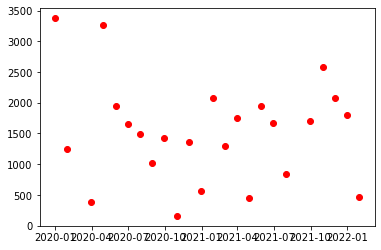

In [63]:
# Distribuicao por tempo:

df = data_nrw_clean.groupby('month_year').agg(value =('month_year', 'count')).reset_index()

plt.plot_date(df['month_year'], 
              df['value'], c = 'red')

In the beggining of the system, we have a higher value os tenders added, but the amount of tenders go up and down during the period, beeing low at january 2022 partially due to lack of days (we got this data before 15.01.2022)

## 1. result_title

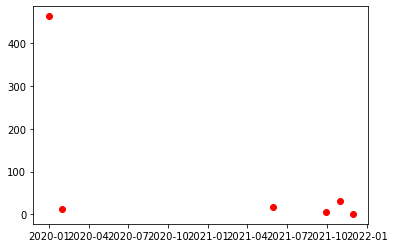

In [39]:
# Distribuicao por tempo:

data_nan_resulttitle = data_nrw_clean[['month_year', 'result_title']]
data_nan_resulttitle = data_nan_resulttitle[data_nan_resulttitle['result_title'].isnull()]
data_nan_resulttitle = data_nan_resulttitle.fillna(1)
data_nan_resulttitle = pd.DataFrame(data_nan_resulttitle.groupby('month_year')['result_title'].count()).reset_index()

#data_nan_resulttitle.plot.scatter(x = 'month_year', y = 'result_title')
plt.plot_date(data_nan_resulttitle['month_year'], 
              data_nan_resulttitle['result_title'], c = 'red')

In [37]:
data_nan_resulttitle

,month_year,result_title
0,2019-12,463
1,2020-01,12
2,2021-05,18
3,2021-09,5
4,2021-10,32
5,2021-11,1


**CONCLUSION 1**

We see that the majority of nan-values in result title occures in december 2019, when the portal register its first tenders. It is possible that these missing values are related to the implementation of data in this new system

## 2. result_procedure_type    

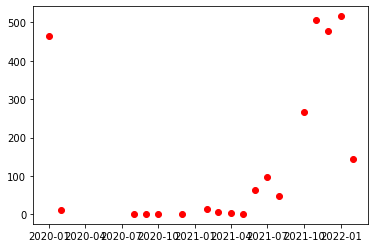

In [41]:
df = data_nrw_clean[['month_year', 'result_procedure_type']]
df = df[df['result_procedure_type'].isnull()]
df = df.fillna(1)
df = pd.DataFrame(df.groupby('month_year')['result_procedure_type'].count()).reset_index()

plt.plot_date(df['month_year'], 
              df['result_procedure_type'], c = 'red')

In [42]:
df

,month_year,result_procedure_type
0,2019-12,464
1,2020-01,12
2,2020-07,2
3,2020-08,1
4,2020-09,1
5,2020-11,1
6,2021-01,15
7,2021-02,5
8,2021-03,4
9,2021-04,1


**CONCLUSION 2**

Again, we see a lot of missing values in december 2019, when the system was created, and the nan-values increasingly grow after may 2021. Is there any reason to believe that these tenders after may 2021 are still opened?

## 3. result_order_type

Are the result order typer nan-values the same as the result_procedure_type values?

In [44]:
df = data_nrw_clean[['month_year', 'result_procedure_type', 'result_order_type']]
df = df[df['result_order_type'].isnull()]
glimpse(df)

Shape:  (2621, 3)
month_year            period[M]      0 (0%) NAs : 2019-12, 2021-10, 2021-12, 2021-12, 2021-12, 2021-11, 2021-1
result_procedure_type object    2621 (100%) NAs : nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
result_order_type     object    2621 (100%) NAs : nan, nan, nan, nan, nan, nan, nan, nan, nan, nan


**CONCLUSION 3** 

When `result_procedure_type` is nan, the `result_order_type` is also nan. Whatever conclusion with have above (conclusion 2) works here too

## 4. result_publication_date

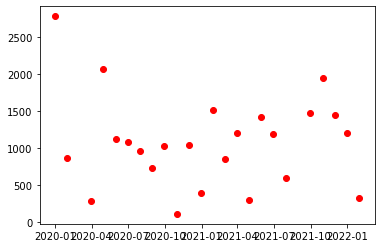

In [45]:
df = data_nrw_clean[['month_year', 'result_publication_date']]
df = df[df['result_publication_date'].isnull()]
df = df.fillna(1)
df = pd.DataFrame(df.groupby('month_year')['result_publication_date'].count()).reset_index()

plt.plot_date(df['month_year'], 
              df['result_publication_date'], c = 'red')